# EDA migration data
In this notebook we analyse the migration data provided by OECD --> https://stats.oecd.org/Index.aspx?DataSetCode=MIG

In [5]:
%load_ext autoreload
%autoreload 2

In [6]:
from migrationchain import MigrationNetworkCreation
from utils import NetworkFeatureComputation

from pathlib import Path
import networkx as nx

In [27]:
df = pd.read_csv('s3://workspaces-clarity-mgmt-pro/jaime.oliver/jobs/value_chain/oecd/migration/MIG_12082020131505678.csv', low_memory=False)
df[df.COU == 'ARG']

,CO2,Country of birth/nationality,VAR,Variable,GEN,Gender,COU,Country,YEA,Year,Value,Flag Codes,Flags


In [20]:
MNC.df_population[MNC.df_population.country == 'ARG']

,country,wkn_population
44,ARG,2765.362868


In [23]:
MNC.df[MNC.df.country_to == 'ARG']

,country_from,country_to,weight


In [3]:
year = 2005
MNC = MigrationNetworkCreation(year=year)
MNC.run()


# Compute network features 
NFC = NetworkFeatureComputation(MNC.G)
NFC.compute_features()
G = NFC.G

# Save
save_to = '//domino/datasets/jaime_oliver/industry_network/scratch/'
network_path = f'{save_to}{year}/migration_network_test.graphml'
Path(network_path).parent.mkdir(parents=True, exist_ok=True)
nx.readwrite.graphml.write_graphml(G, network_path)


betweenness_centrality
pagerank
hits
godfather index


In [11]:
network_path = f'{save_to}{2015}/migration_network.graphml'

G = nx.readwrite.graphml.read_graphml(network_path)

In [15]:
nx.get_node_attributes(G,'pageransdck')

{}

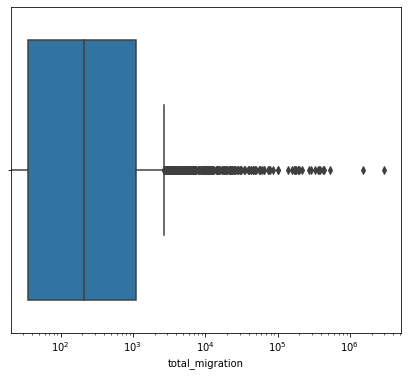

In [5]:
import seaborn as sns 
import matplotlib.pyplot as plt

f, ax = plt.subplots(figsize=(7, 6))
ax.set_xscale("log")

sns.boxplot(MNC.df['total_migration'].dropna(), ax=ax)